In [131]:
# Import the necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


In [132]:
# import the data
data = pd.read_excel("data/SUS.xlsx")
data

,User ID:,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q9,Q9.1,Q10
0,1,2,4,4,4,3,4,4,4,4,4
1,2,3,3,3,4,2,3,2,2,3,4
2,2,3,2,3,3,3,3,3,3,3,4
3,3,2,3,2,3,3,3,3,2,4,3
4,4,3,4,4,4,4,4,4,4,3,3
5,5,3,3,3,3,3,2,3,3,3,2
6,6,3,3,3,3,3,3,4,4,3,4
7,7,3,4,3,4,3,3,3,3,4,3
8,8,2,3,3,3,3,3,4,2,3,3
9,9,2,4,3,4,3,3,4,4,3,4


In [133]:
df = pd.DataFrame(data)

sus_columns = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q9", "Q9.1", "Q10"]
df["SUS_Score"] = df[sus_columns].sum(axis=1) * 2.5

df["SUS_Score"].describe()

count    17.000000
mean     77.058824
std      11.931946
min      52.500000
25%      70.000000
50%      80.000000
75%      85.000000
max      95.000000
Name: SUS_Score, dtype: float64

## T-test
Here we use a single sampled two sided t-test, because we only have one sample and we have a "population mean".

In [134]:
mu = 67.0

# We proceed to test whether this is significantly different (with criteria 0.05)
# scipy.stats has a function for one-sample t-test, note that this is *TWO TAILED*
t,p = stats.ttest_1samp(df["SUS_Score"], mu)

# The t-statistic and probability for a *TWO TAILED TEST*
print ('t_two_tailed:', t)
print ('p_two_tailed:', p)

t_two_tailed: 3.475844895917788
p_two_tailed: 0.003118651420425001


## Conclusion
Our p-value is below 0,005 (it's 0,003) so we discard the null-hypothesis that there isn't a significant difference between the two scores.

In [135]:
confidence = 0.95
mean = df["SUS_Score"].mean()
sem = stats.sem(df["SUS_Score"])
ci = stats.t.interval(confidence, len(df["SUS_Score"])-1, loc=mean, scale=sem)
print(f"95% confidence interval for SUS: {ci}")

95% confidence interval for SUS: (70.92398324094759, 83.19366381787594)


## Using the CI
If we substitute the SUS mean of 77.06 with the lower margin of the CI 70.92 we

((array([-1.7512281 , -1.29947609, -1.01741764, -0.79927841, -0.61386703,
         -0.44755083, -0.29283065, -0.14485444,  0.        ,  0.14485444,
          0.29283065,  0.44755083,  0.61386703,  0.79927841,  1.01741764,
          1.29947609,  1.7512281 ]),
  array([52.5, 57.5, 65. , 70. , 70. , 72.5, 72.5, 75. , 80. , 80. , 82.5,
         82.5, 85. , 85. , 92.5, 92.5, 95. ])),
 (12.456480686935986, 77.05882352941177, 0.9844062271694634))

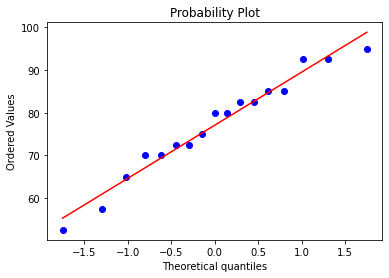

In [136]:
# Plotting
stats.probplot(df["SUS_Score"], plot=plt)

